In [1]:
# %pip install -r requirements.txt
# %pip install pandas
# %pip install anndata
# %pip install scanpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


              barcode  present  xgrad  ygrad     x     y
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174
1  TACCGATCCAACACTT-1        0      1      1  2630  2243
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450


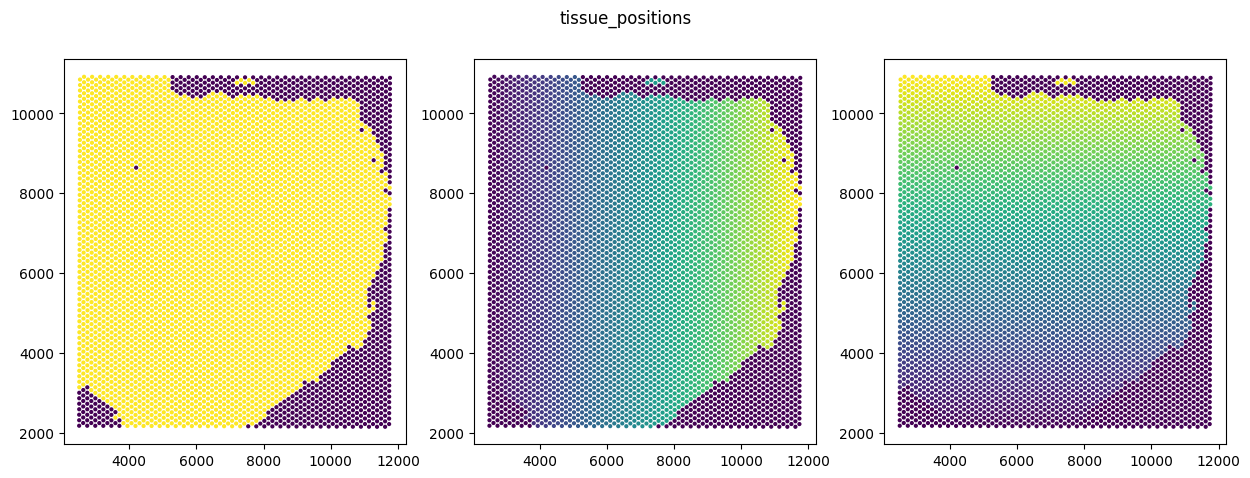

In [2]:
import os
import csv
import numpy as np
import scanpy as sc
import pandas as pd
from anndata import AnnData
import matplotlib.pyplot as plt
# Read the CSV file and create a dataframe
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
# Display the dataframe
print(df.head())
#display the 3 graps of the dataframe
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('tissue_positions')
ax1.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present']), cmap = 'viridis', s = 4)
ax2.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['xgrad']), cmap = 'viridis', s = 4)
ax3.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['ygrad']), cmap = 'viridis', s = 4)
plt.show()

              barcode layer_guess
0  AAACAACGAATAGTTC-1          -1
1  AAACAAGTATCTCCCA-1          L3
2  AAACAATCTACTAGCA-1          L1
3  AAACACCAATAACTGC-1          WM
4  AAACAGCTTTCAGAAG-1          L6
              barcode  present  xgrad  ygrad     x     y
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174
1  TACCGATCCAACACTT-1        0      1      1  2630  2243
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450
{'L4', '-1', 'WM', 'L1', 'L5', 'L6', 'L3', 'L2'}
              barcode  present  xgrad  ygrad     x     y layer_guess
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174         NaN
1  TACCGATCCAACACTT-1        0      1      1  2630  2243         NaN
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312         NaN
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381         NaN
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450    

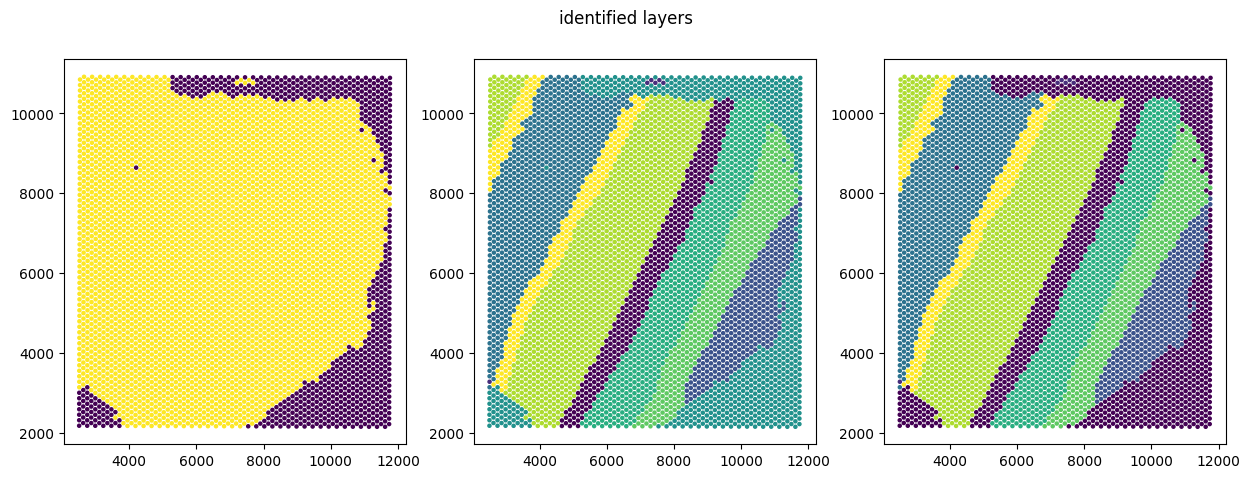

In [3]:
# Read the CSV file and create a dataframe
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
# metadata = 'data\data1\metadata.tsv'
metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
# Display the dataframe
print(metadata.head())
print(df.head())
layers = set(metadata['layer_guess'])
print(layers)

#if barcode in df['barcode'] matches a barcode in metadata['barcode'], then add the meta['layer_guess'] to df['layer_guess'] else put NAN
df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
#assign a df['color'] to each in set(df['layer_guess'])
colors = set(df['layer_guess'])
print(df.head())
print(colors)
df['color'] = df['layer_guess'].apply(lambda x: list(colors).index(x))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('identified layers')
ax1.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present']), cmap = 'viridis', s = 5)
ax2.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['color']), cmap = 'viridis', s = 5)
ax3.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['color']), cmap = 'viridis', s = 5)
plt.show()

In [4]:
df.head()

,barcode,present,xgrad,ygrad,x,y,layer_guess,color
0,ACGCCTGACACGCGCT-1,0,0,0,2510,2174,NaN,4
1,TACCGATCCAACACTT-1,0,1,1,2630,2243,NaN,4
2,ATTAAAGCGGACGAGC-1,0,0,2,2511,2312,NaN,4
3,GATAAGGGACGATTAG-1,0,1,3,2631,2381,NaN,4
4,GTGCAAATCACCAATA-1,0,0,4,2511,2450,NaN,4


In [5]:
def showadata(adata):
    print('\nAdata obs: \n', adata.obs,'\n')
    print('\nGround truth layers: \n',set(adata.obs['ground_truth']))
    print('\nGround truth batch: \n',set(adata.obs['batch']))
    print('\nAdata var: \n',adata.var.keys(),adata.var,'\n')
    print(adata.obsm)

def addspatial(adata):
    obs_names = adata.obs.index.tolist()
    barcode_adata , unkownno_adata , adata_lyrguess , adata_grpguess = [],[],[],[]
    for obs in obs_names:
        seg = obs.split('_')
        barcode_adata.append(seg[0])
        unkownno_adata.append(seg[1])
        adata_lyrguess.append(seg[2].split('-')[0])
    adata.obs['barcode'] = barcode_adata
    adata.obs['unkownno'] = unkownno_adata
    adata.obs['adata_lyrguess'] = adata_lyrguess
    # showadata(adata)
    # print('\nADATA uniqno:', set(adata.obs['unkownno']))
    # print('\nADATA uniqlyr:', set(adata.obs['adata_lyrguess']))
    return adata

def showadata_h5(adata):
    print('\nAdata obs: \n', adata.obs.head(),'\n')
    print('\nAdata vars: \n', adata.var.head(),'\n')
    print('\nAdata uns: \n',adata.uns.keys(),'\n')
    print('\nAdata obsm: \n', adata.obsm,'\n')
    # print('\nGround truth batch: \n',set(adata.obs['batch']))
    # print('\nAdata var: \n',adata.var.keys(),adata.var,'\n')
    # print(adata.obsm)

def showobs_h5(adata):
    # print(adata_h5.uns)
    # adata_h5.uns['spatial'].keys()
    print(adata_h5.uns['spatial']['151507'].keys())
    # adata_h5.uns['spatial']['151507'].keys()
    print(adata_h5.uns['spatial']['151507']['images'].keys())
    # adata_h5.uns['spatial']['151507']['images'].keys()
    print(adata_h5.uns['spatial']['151507']['images']['hires'].shape)
    # adata_h5.uns['spatial']['151507']['images']['hires'].shape
    print(adata_h5.uns['spatial']['151507']['images']['lowres'].shape)
    # adata_h5.uns['spatial']['151507']['images']['lowres'].shape
    print(adata_h5.uns['spatial']['151507']['scalefactors'].keys())
    # adata_h5.uns['spatial']['151507']['scalefactors'].keys()
    print(adata_h5.uns['spatial']['151507']['scalefactors']['tissue_hires_scalef'])
    # adata_h5.uns['spatial']['151507']['scalefactors']['tissue_hires_scalef']
    print(adata_h5.uns['spatial']['151507']['metadata'])


In [6]:
# df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
# metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
# layers = set(metadata['layer_guess'])
# df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
# colors = set(df['layer_guess'])
# df['color'] = df['layer_guess'].apply(lambda x: list(colors).index(x))
# print(df.head())
# print(df.shape)

In [7]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
path = 'data\data1'
adata = sc.read(os.path.join(path,f'DLPFC_single_cell_data_downsampled.h5ad'))
adata_h5 = sc.read_visium(path, count_file = "filtered_feature_bc_matrix.h5", source_image_path = path)
# df_meta = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
df = pd.read_csv(os.path.join(path,'spatial', f'tissue_positions_list.csv'))  
metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
layers = set(metadata['layer_guess'])
df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
# df['color'] = df['layer_guess'].apply(lambda x: list(set(df['layer_guess'])).index(x))
df_meta = df
label = pd.Categorical(df_meta['layer_guess']).codes
adata_h5ad = addspatial(adata) #add spatial info to adata, extract barcode, unkownno, adata_lyrguess

h5_barcodes = adata_h5.obs.index.tolist()
adata_h5.obs['label'] = df_meta['layer_guess'][df_meta['barcode'].isin(h5_barcodes)].values
adata_h5.obs['present'] = df_meta['present'][df_meta['barcode'].isin(h5_barcodes)].values
adata_h5.obs['x'] = df_meta['x'][df_meta['barcode'].isin(h5_barcodes)].values
adata_h5.obs['y'] = df_meta['y'][df_meta['barcode'].isin(h5_barcodes)].values
adata_h5.obs['xgrad'] = df_meta['xgrad'][df_meta['barcode'].isin(h5_barcodes)].values
adata_h5.obs['ygrad'] = df_meta['ygrad'][df_meta['barcode'].isin(h5_barcodes)].values
adata_h5.obs['layer_guess'] = df_meta['layer_guess'][df_meta['barcode'].isin(h5_barcodes)].values

# adata_h5.obs['pred'] = pred.array.astype(str)

d:\Github\CS690\FinalProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.26.2 scipy==1.11.4 pandas==2.1.3 scikit-learn==1.3.2 statsmodels==0.14.0 pynndescent==0.5.11


d:\Github\CS690\FinalProject\.venv\Lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


reading data\data1\filtered_feature_bc_matrix.h5
 (0:00:02)


d:\Github\CS690\FinalProject\.venv\Lib\site-packages\anndata\_core\anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Github\CS690\FinalProject\.venv\Lib\site-packages\anndata\_core\anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
print(adata_h5.shape)
adata_h5.obs.head()

(4226, 33538)


,in_tissue,array_row,array_col,label,present,x,y,xgrad,ygrad,layer_guess
AAACAACGAATAGTTC-1,1,0,16,L1,1,2513,3138,0,14,L1
AAACAAGTATCTCCCA-1,1,50,102,L2,1,2633,3207,1,15,L2
AAACAATCTACTAGCA-1,1,3,43,-1,1,2514,3276,0,16,-1
AAACACCAATAACTGC-1,1,59,19,L1,1,2634,3344,1,17,L1
AAACAGCTTTCAGAAG-1,1,43,9,L1,1,2514,3414,0,18,L1


(4226, 64)
(4226, 33538)
KeysView(AxisArrays with keys: spatial, ConGI)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


d:\Github\CS690\FinalProject\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
d:\Github\CS690\FinalProject\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


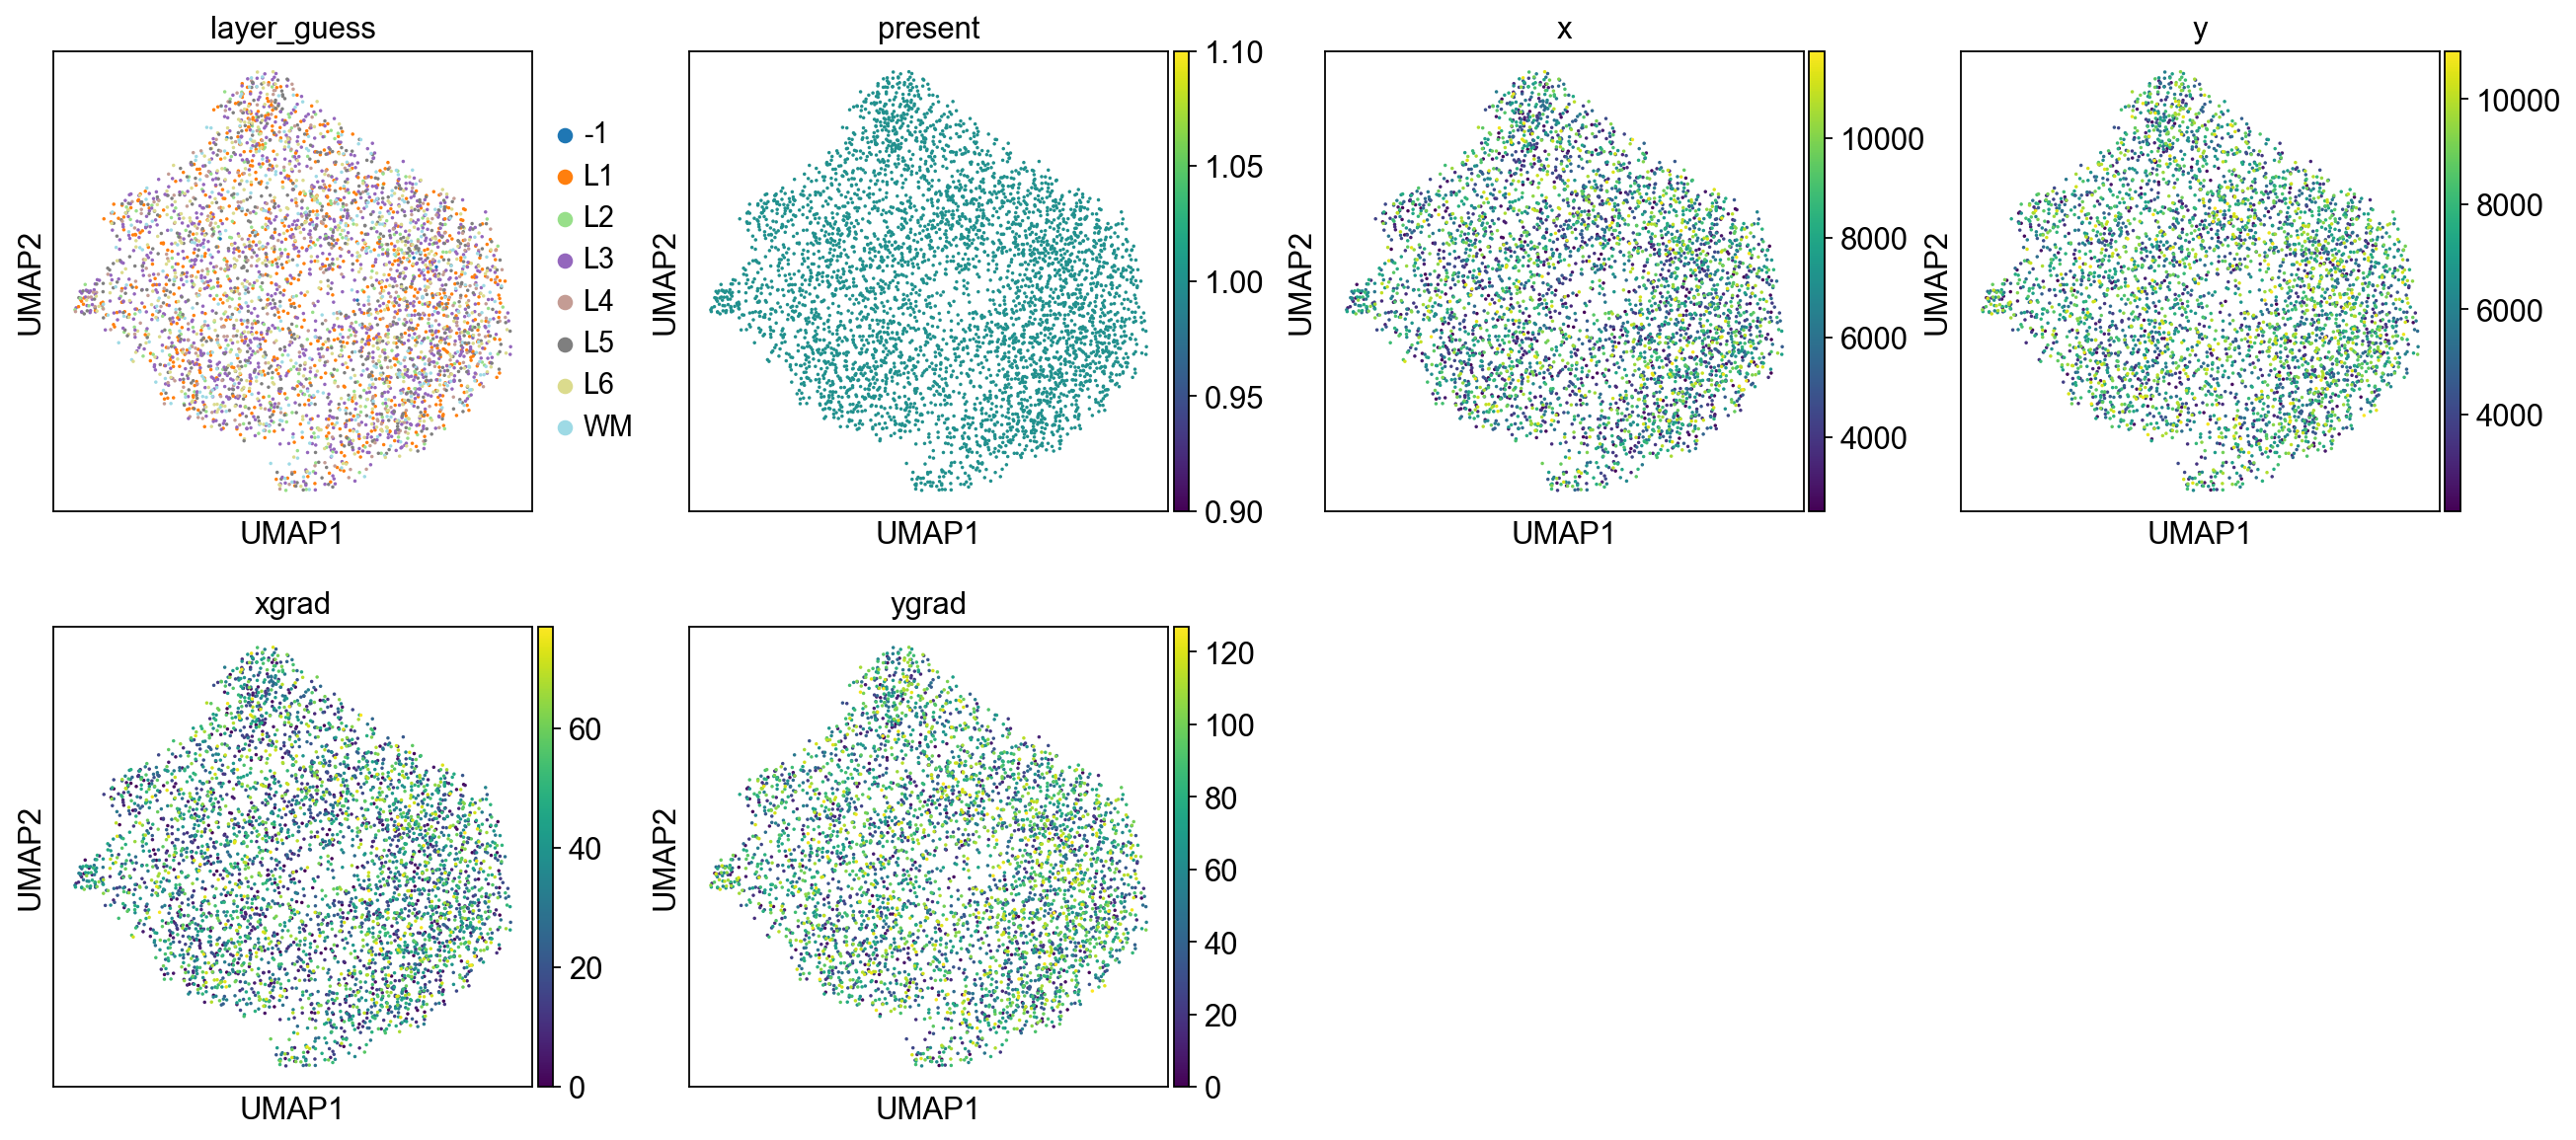

In [9]:
xg = np.load(os.path.join('data\embeddings',f'151507_xg.npy'))
xi = np.load(os.path.join('data\embeddings',f'151507_xi.npy'))
z = xg + 0.1*xi
print(z.shape)
print(adata_h5.shape)
adata_h5.obsm['ConGI'] = z
print(adata_h5.obsm.keys())
# showadata_h5(adata_h5)
# print(adata_h5.uns['umap'])
# print(adata_h5.uns['umap']['params'])
# print(adata_h5.uns['neighbors'])
sc.pp.neighbors(adata_h5, use_rep='ConGI')
sc.tl.umap(adata_h5)
sc.pl.umap(adata_h5, color=['layer_guess','present','x','y','xgrad','ygrad'], size=10, legend_loc='right margin', palette='tab20')


In [13]:
print(adata_h5.shape)
print(adata_h5.var.head())
adata_h5.obs.head()
# adata_h5.write(os.path.join('data\embeddings',f'151507.h5ad'))

(4226, 33538)
                    gene_ids    feature_types  genome
MIR1302-2HG  ENSG00000243485  Gene Expression  GRCh38
FAM138A      ENSG00000237613  Gene Expression  GRCh38
OR4F5        ENSG00000186092  Gene Expression  GRCh38
AL627309.1   ENSG00000238009  Gene Expression  GRCh38
AL627309.3   ENSG00000239945  Gene Expression  GRCh38


,in_tissue,array_row,array_col,label,present,x,y,xgrad,ygrad,layer_guess
AAACAACGAATAGTTC-1,1,0,16,L1,1,2513,3138,0,14,L1
AAACAAGTATCTCCCA-1,1,50,102,L2,1,2633,3207,1,15,L2
AAACAATCTACTAGCA-1,1,3,43,-1,1,2514,3276,0,16,-1
AAACACCAATAACTGC-1,1,59,19,L1,1,2634,3344,1,17,L1
AAACAGCTTTCAGAAG-1,1,43,9,L1,1,2514,3414,0,18,L1
